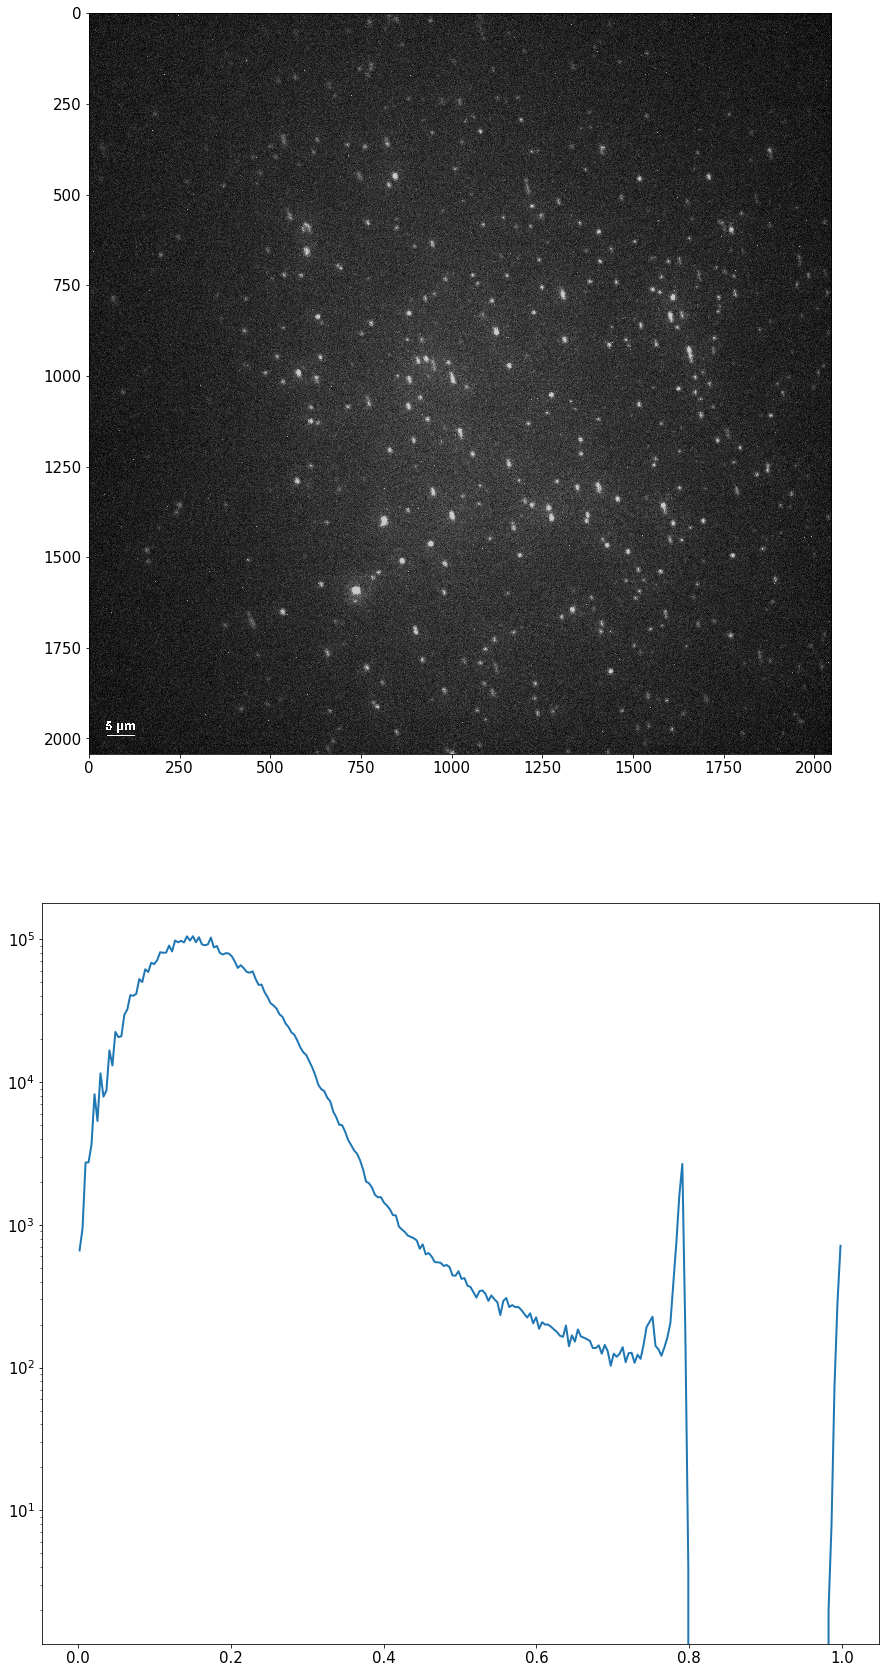

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from skimage.exposure import histogram
from skimage.color import rgb2gray
%matplotlib inline

image = Image.open('Raw data_Examples/Device2_Area1_During30kcaseinandADAMTS13flow.jpg')
img_array = np.array(image)
image_gray = rgb2gray(img_array)
hist, hist_centers = histogram(image_gray)

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(2, 1, figsize=(15, 30))
axes[0].imshow(image_gray, cmap=plt.cm.gray)
plt.yscale('log')
axes[1].plot(hist_centers, hist, lw=2)

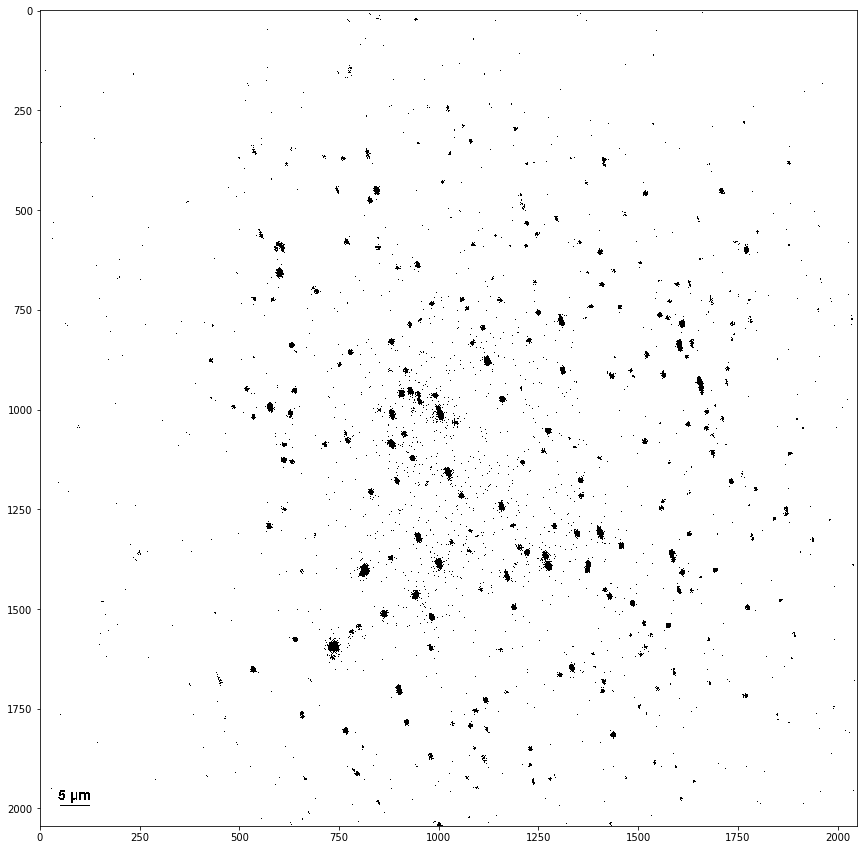

<Figure size 1080x1080 with 0 Axes>

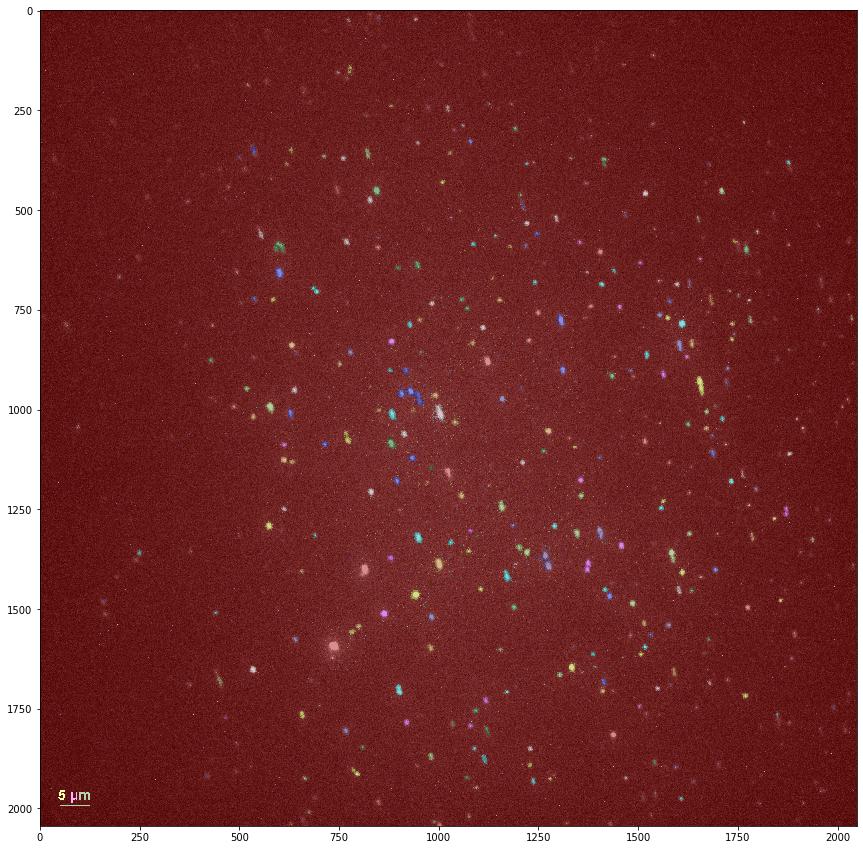

In [10]:
from skimage.filters import threshold_yen
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.segmentation import clear_border
from skimage.color import label2rgb

# apply threshold
image = image_gray
thresh = threshold_yen(image)
binary = image <= thresh
plt.figure(figsize = (15,15))
imshow(binary,cmap=plt.cm.gray)

# remove artifacts connected to image border
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)
plt.figure(figsize = (15,15))
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(image_label_overlay)

In [39]:
from skimage.measure import label, regionprops
props = regionprops(label_image,intensity_image=image_gray, coordinates='xy')
for i in props: 
    #exclude circular dots
    if i.eccentricity > 0:                                
        print(i.eccentricity)

0.9128709291752769
1.0
1.0
1.0
0.8293122522423684
1.0
1.0
1.0
0.8365227522279572
1.0
1.0
1.0
1.0
1.0
0.6855296187407376
1.0
1.0
1.0
1.0
0.6323532189965462
1.0
1.0
0.4205121462799084
0.2874797872880346
1.0
0.9113774556177727
1.0
1.0
1.0
1.0
0.8872639702889309
0.42981118999070234
1.0
1.0
1.0
0.6795448190953473
1.0
0.7003755391269371
0.5783093780773666
0.5991294583142146
0.6108293328722286
0.6120433888290628
1.0
0.7972333099880166
1.0
0.5462625246494591
0.7651274549972873
0.6726765697235143
0.7211200002014747
0.669878048069566
0.7191895155701928
1.0
1.0
0.5088502445991073
1.0
0.6557547765383949
0.5508958124445406
0.22457963305841586
0.6732575338176849
1.0
0.6231182576336516
0.9483936722717236
0.2394423440771232
0.43610034213167614
0.6487684637792581
1.0
1.0
0.9606594016383402
0.9114855646977184
0.8569731339865756
1.0
0.9490912789078926
0.5866332298836212
0.5412604728816609
0.5064352080708489
0.5921184607712484
1.0
1.0
1.0
0.4738967223641212
0.3429971702850177
1.0
0.6465445600000892
0.8514